# Data Visualization

Representing data visually is one of the most important aspects of communicating ideas in social science. Although we rely on analytical tools from statistics to qualitative coding to support our findings and inferences about social phenomena, data visualization helps readers grasp important information about the scale and the context of those findings. This chapter will introduce you to the `matplotlib` package, more specifically the `matplotlib.pyplot` sub-package to generate your plots. 

The matplotlib package behaves somewhat differently from the other python packages you have learned about so far. It is overall exactly like Pandas, NumPy, or ZipFile, where packages provide a set of functions with their own arguments and syntax. However, matplotlib functions have an interesting quirk where you can create a simple or default chart in a line of code, and then call for additional customizations in a new line of code without needing to reference an assigned python object. You'll see many examples in this chapter. First we'll introduce the default and standard plot types available in pandas' `.plot()` function, which uses matplotlib.pyplot as it's backend. Therefore you will need to import those packages together.

In [1]:
# This code cell will be in every one of our chapters in Jupyter Notebook
# The function allows you to see every line of output when the code has multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ACS Housing Data
We would like for you to visualize data in specific years, across multiple years, and comparing different groups. The American Community Survey DP04 1-year data that you cleaned up in the control structures assignment will be our source for plotting this kind of information because it is organized by year and by state. You should load the `housing.csv` file that you created and saved on your computer in the control structures assignment, hopefully located in a folder within the main 'Python for social science' directory. As a reminder from your assignment, the table below lists the variables, their new names, and a description of the variables.

|Variable|New Name|Label|
|:-:|:-:|:-:|
|NAME|Split into two: CITY + STATE|	Geographic Area Name|
|YEAR|YEAR|Not in the CSV files; variable created in the assignment|
|DP04_0001E |TOT_UNITS|HOUSING OCCUPANCY Total housing units|
|DP04_0088E |MED_VALUE|Estimate Median Value (dollars)|
|DP04_0132E	|MED_RENT|Estimate|Median Rent(dollars)|
|DP04_0002E |OCCUP_OCCUP | HOUSING OCCUPANCY Total housing units Occupied housing units|
|DP04_0003E	|VACANT| HOUSING OCCUPANCY Total housing units Vacant housing units|
|DP04_0045E	|OCCUP_TENURE| HOUSING TENURE Occupied housing units|
|DP04_0046E	|OCCUP_OWNR | HOUSING TENURE Occupied housing units Owner-occupied|
|DP04_0047E |OCCUP_RENTR | HOUSING TENURE Occupied housing units Renter-occupied|
|DP04_0017E |BUILT_2020 |Year housing built: 2020 or later|
|DP04_0018E |BUILT_2010 |Year housing built: 2010 to 2019|
|DP04_0019E |BUILT_2000 |Year housing built: 2000 to 2009|
|DP04_0020E |BUILT_1990 |Year housing built: 1990 to 1999|
|DP04_0021E |BUILT_1980 |Year housing built: 1980 to 1989|
|DP04_0022E |BUILT_1970 |Year housing built: 1970 to 1979|
|DP04_0023E |BUILT_1960 |Year housing built: 1960 to 1969|
|DP04_0024E |BUILT_1950 |Year housing built: 1950 to 1959|
|DP04_0025E |BUILT_1940 |Year housing built: 1940 to 1949|
|DP04_0026E |BUILT_1939 |Year housing built: 1939 or earlier|

We'll also ask you to create a new variable called `VAC_RATE`, or vacancy rate, which should be the value of `VACANCY` divided by `TOT_UNITS`, and multiplied by ten. This should provide the percent of homes that are vacant in each locale. 

In [3]:
housing = pd.read_csv('../../assignments/control_structures/housing.csv')

# create the vacancy rate variable
housing['VAC_RATE'] = (housing['VACANT']/housing['TOT_UNITS'])*100

## Pyplot .plot()

Pandas dataframes can make use of matplotlib with the `.plot()` function. Like so many pandas functions, you can just add it to any pandas vector or dataframe and pyplot will, by default without additional arguments, return a line plot. Let's look at the number of vacant homes across california in 2022 by selecting `VACANT` from the california_22 dataframe, and appending `.plot()` to it.

<Axes: >

count      7217.000000
mean       8025.565193
std       18620.800430
min           0.000000
25%        1873.000000
50%        3553.000000
75%        7358.000000
max      378036.000000
Name: VACANT, dtype: float64

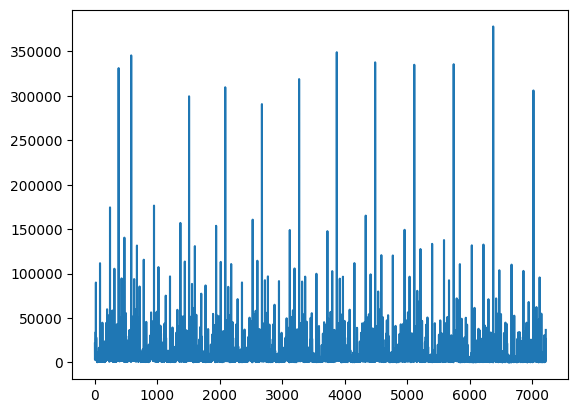

In [4]:
housing['VACANT'].plot()
housing['VACANT'].describe()

Not the clearest graph. What are the many peaks between zero and seven thousand? What do the numbers from zero to seven thousand mean? We don't have any titles to interpret this chart, but if you look at the summary statistics from '.describe()' you will see that there are 7217 observations. This is your first hint about what's going on. The 'plot()' default is the __line__ plot, and it expects a minimum of two variables for the x and y axes: `.plot(x,y)`. If you provide no explicit values for the x-axis, like we just did, the default value for the x axis will be the dataframe's __index__, which are the row numbers from `housing`. Remember that row numbers are just a sequence of values from zero to however many observations there are. In this ACS dataset, the observations are cities so the x-axis values 0-7000+ are US Census locales (over twelve years, which would explain the peaks). 

This is a good example that visual representations are not always clearer than simple descriptive statistics, and definitely not to blindly trust the default choice from the '.plot()' function. You can glean the range and variability of housing vacancy in the US with both the line plot and the mean and standard deviation, but there's barely anything interesting to observe. That is because the data we threw at the .plot() and .describe() functions is already very vague: The number of vacant homes in every locale the Census Bureau counted, in every state and territory of the United States, for every year from 2010 to 2022. Good visualizations first and foremost come from your clear understanding of the data's context, the shape of the data, and your experience with what data fits with what kinds of plots. 

For example, it might make more sense for the _x_ axis to represent the year and to focus on one state's _average_ vacancy. Below is a preview of what that would look like.

<Axes: xlabel='YEAR'>

,VACANT
count,12.000000
mean,4047.782439
std,401.367931
min,3587.956204
25%,3849.111278
50%,3930.332559
75%,4118.027499
max,5000.125984


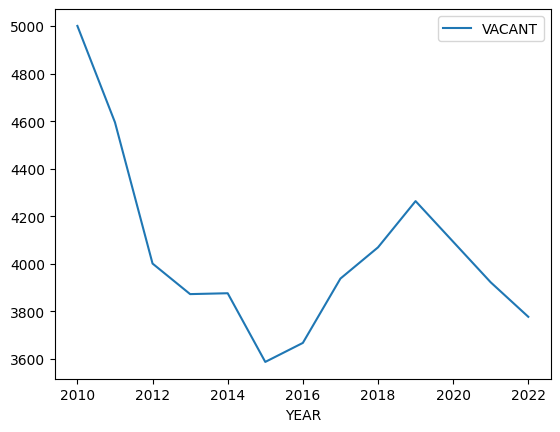

In [5]:
df = housing[housing['STATE'].str.contains('California')]
df = df.groupby('YEAR').aggregate({'VACANT':'mean'})
df.plot()
df.describe()

### Paring the data down 

You are going to look at a lot of information from multiple states and years, but to start off you should make a subset of the data that is easier to interpret. Create a new object named `california` where the `housing['STATE']` variable contains the string 'California'. Then create a `california_22` object that subsets California as well as for when `housing[YEAR]` is 2022. We'll look at the multi-year `california` dataframe a little later, for now we can use this california 2022 subset to visualize the default pyplot plots.

In [6]:
# subset for the state of California
california = housing[housing['STATE'].str.contains('California')]
california.head(5)

# subset for california and 2022 with 2 conditions
california_22 = housing[(housing['YEAR']==2022) & (housing['STATE'].str.contains('California'))]
california_22.head(5)

,NAME,CITY,STATE,YEAR,TOT_UNITS,MED_VALUE,MED_RENT,OCCUP_OCCUP,VACANT,OCCUP_TENURE,...,BUILT_2010,BUILT_2000,BUILT_1990,BUILT_1980,BUILT_1970,BUILT_1960,BUILT_1950,BUILT_1940,BUILT_1939,VAC_RATE
28,"Alameda city, California",Alameda city,California,2010,30713,651700.0,1234.0,28011,2702,13143,...,240.0,1098.0,4263.0,4590.0,5570.0,1494.0,1801.0,10552.0,30713.0,8.797578
29,"Alhambra city, California",Alhambra city,California,2010,29941,488500.0,1148.0,28100,1841,10693,...,937.0,1859.0,4677.0,2456.0,3235.0,4115.0,4113.0,8464.0,29941.0,6.148759
30,"Anaheim city, California",Anaheim city,California,2010,107363,406200.0,1240.0,100404,6959,48584,...,3080.0,10819.0,12701.0,26905.0,21416.0,22722.0,2735.0,3116.0,107363.0,6.481749
31,"Antioch city, California",Antioch city,California,2010,35266,233900.0,1267.0,30970,4296,19439,...,4084.0,5282.0,7289.0,8217.0,4434.0,1748.0,1946.0,1295.0,35266.0,12.181705
32,"Apple Valley town, California",Apple Valley town,California,2010,26470,170500.0,1012.0,23900,2570,16895,...,3052.0,2595.0,8459.0,4839.0,1665.0,1724.0,481.0,0.0,26470.0,9.709105


,NAME,CITY,STATE,YEAR,TOT_UNITS,MED_VALUE,MED_RENT,OCCUP_OCCUP,VACANT,OCCUP_TENURE,...,BUILT_2010,BUILT_2000,BUILT_1990,BUILT_1980,BUILT_1970,BUILT_1960,BUILT_1950,BUILT_1940,BUILT_1939,VAC_RATE
6606,"Alameda city, California",Alameda city,California,2022,30553,NaN,NaN,27630,2923,27630,...,676.0,1629.0,1801.0,2629.0,4816.0,4876.0,2180.0,1969.0,9707.0,9.566982
6607,"Alhambra city, California",Alhambra city,California,2022,33976,NaN,NaN,31579,2397,31579,...,1098.0,1880.0,1977.0,5766.0,3216.0,3554.0,5069.0,5024.0,6354.0,7.054980
6608,"Anaheim city, California",Anaheim city,California,2022,109459,9784.0,NaN,105885,3574,105885,...,9470.0,6812.0,9548.0,12979.0,23782.0,18745.0,22516.0,1954.0,2763.0,3.265150
6609,"Antioch city, California",Antioch city,California,2022,38701,829.0,NaN,37461,1240,37461,...,1362.0,4820.0,8415.0,7066.0,6250.0,3129.0,3128.0,2353.0,577.0,3.204052
6610,"Apple Valley town, California",Apple Valley town,California,2022,26759,51.0,NaN,26007,752,26007,...,1891.0,4638.0,3667.0,9436.0,4158.0,719.0,2081.0,58.0,0.0,2.810269


## Pandas' standard set of plots

To choose the kind of plot you want to use under plot, you use the aptly named `kind=` argument. In pandas' documentation, the list of plots available under kind are:

- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)

When you need to plot a single variable in order to talk about the quantity, frequency, or the variance of the values, we are talking about the _distribution_ of the variable. From the list of plots, you would use histograms, bars, boxplots, density, area, and pie plots.

On the other hand, if you are interested in representing the _relationship_ between two variables, we would be talking about _pairwise_ data. From the list of plots, you would use line, scatter, and hexbin plots. These pairwise plots help the reader understand visually whether variables correlate, how strongly they correlate, and in which direction. 

## Distributions

### Bar Charts
We'll begin with the distribution of the `VACANT` variable 

<Axes: >

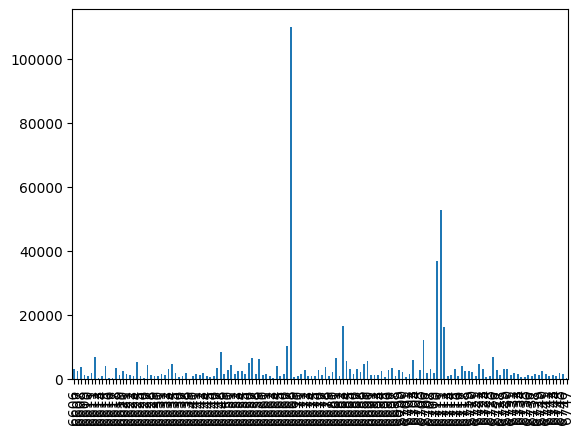

In [7]:
california_22['VACANT'].plot(kind='bar')

As you can tell, we are still visualizing far too many locations on the x-axis. You can filter your data to the cities with the most vacancies using a combination of selection, sorting, and subsetting the top ten observations. Look closely at how we purposefully select both `VACANT` and `CITY` in double brackets (`[[]]`) in order to get a dataframe object instead of a single vector. This is so you can choose `CITY` as the x-axis value in the `plot(x=)` argument, instead of defaulting to the index number as you have seen. 

You can also get a horizontal bar chart by changing the 'kind=' argument to 'barh'. We included both arguments in the cell below to show how to charts can appear in the same cell. As an exercise, try changing the 'head()' function to 'tail()' and the 'ascending' argument to 'False' in different combinations to change the order cities appear in your plots.

,VACANT,CITY
6668,110084,Los Angeles city
6711,52641,San Francisco city
6710,36871,San Diego city
6683,16478,Oakland city
6712,16236,San Jose city
6706,12071,Sacramento city
6667,10286,Long Beach city
6648,8348,Fresno city
6726,6967,Stockton city
6612,6712,Bakersfield city


<Axes: xlabel='CITY'>

<Axes: ylabel='CITY'>

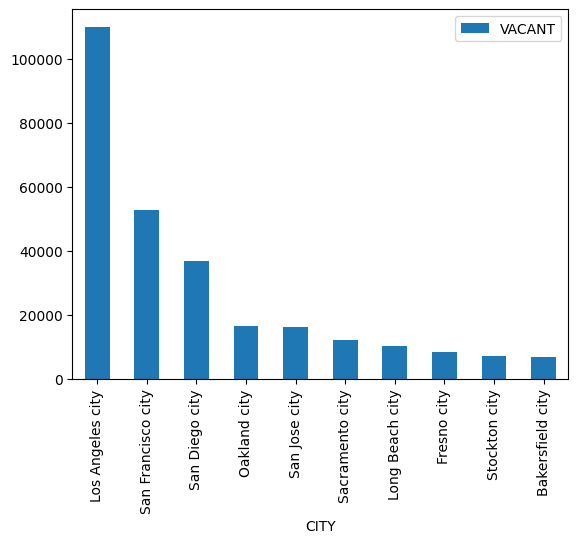

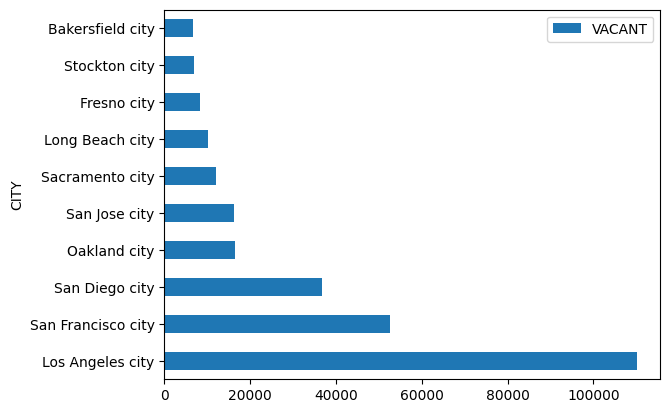

In [8]:
df = california_22[['VACANT','CITY']].sort_values(by='VACANT', ascending=False).head(10)
df
df.plot(x='CITY',kind='bar')
df.plot(x='CITY',kind='barh')

You may be wondering why the city names end with the strong "city", as in Los Angeles City. The census data has some naming conventions for locales of different sizes and that text is at the end of the location name. Because city names can have two or more words, it is a little harder to clean up. However, we will ask you to clean those city names in a homeork assignment. Leave the city strings alone for now.

### Histograms

To view the distribution of vacant properties by the number of times (i.e. the frequency) that a specific value appears in the data, you would need a histogram, where kind='hist'. Histograms place frequencies into ranges of values, or 'bins'. This 'bin' is represented by a thicker (or thinner) bar that encompasses values between some values of the x-axis. This can be an issue when the data have a very high range of values, which is the case for vacancies. It is almost like bad image resolution on a pixelated image. We can remedy this by increasing the number of bins from the default of 10 to 100:

<Axes: ylabel='Frequency'>

<Axes: ylabel='Frequency'>

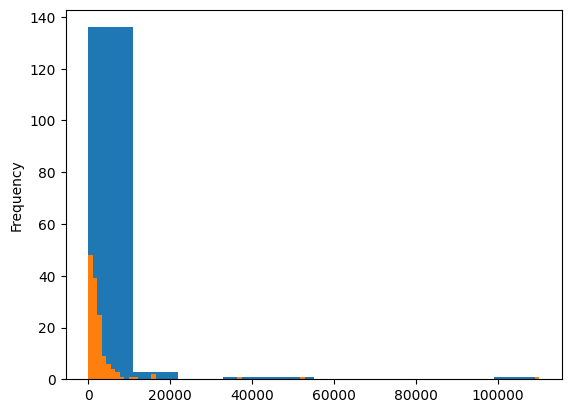

In [9]:
california_22['VACANT'].plot(kind='hist')
#plt.show() # this command splits one plot from the next when the plot kind is the same.
california_22['VACANT'].plot(kind='hist',bins=100)

Notice that calling the same plot in one code cell overlays one histogram on top of the other. Matplotlib's behavior is to overlay new plotting functions on top of your first plot until you call `plt.show()` (unless you call a new _kind_ of plot). Uncomment the plt.show() function above and rerun the code cell to see how the output changes.

This plot is somewhat informative, but because of larger outlier cities with hundreds of thousands of vacant units, we lose sight of the majority of the data. One way fix the very high range of values (and this applies for other plot kinds as well) is to use the percent of units that are vacant. We created this percentage earlier and named it `VAC_RATE`. Representing vacancies as a percent of total units helps clarify your data; The largest cities in the ACS dataset will always have an outsize number of vacancies, but it is important to understand whether the _rate_ of vacancies is disproportionate relative to other cities. Let's check if this is true

<Axes: ylabel='Frequency'>

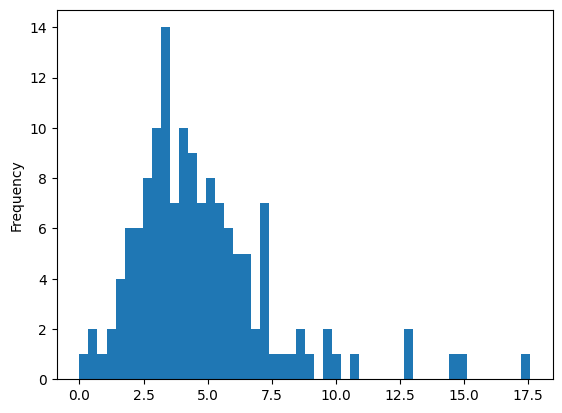

In [10]:
california_22['VAC_RATE'].plot(kind='hist',bins=50)

It looks like there are indeed multiple cities whose vacancies are disproportionately high, relative to the average vacancy rates around the peak. Now you could use this information to filter your dataframe and discover what locales' vacancy rates were exceedingly high.

### Density plots

Density plots are the histogram's curved sibling. They also represent how often a value appears in the data, with two main differences: Visually, you get a curve instead of vertical bars; and conceptually, the y-axis represents the proportion/percentage of the data that fit under value on the x-axis. The entire _area_ underneath the line comprises 100% of the the data. About 17% (0.17) of cities' vacancy rates are at the average, and these percentages decrease as you move away from the peak. 

<Axes: ylabel='Density'>

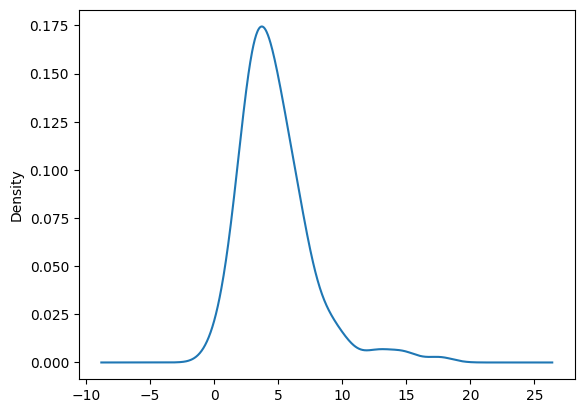

In [11]:
california_22['VAC_RATE'].plot(kind='density')

### Boxplots

Boxplots serve to visualize average and variance in the data within the 'box', whether your data are skewed positively or negatively away from the mean, and if you have outlying observations. You'll notice the y-axis represents the range of values of `VAC_RATE` by default. 

<Axes: >

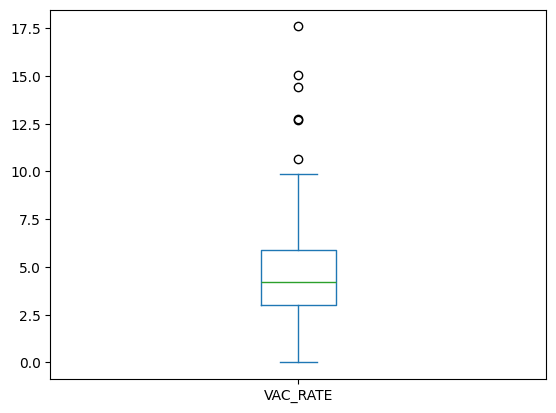

In [12]:
california_22['VAC_RATE'].plot(kind='box')

This boxplot tells us the mean vacancy rate with the green horizontal line. The box shows quartiles above and below the mean, and you can observe that the data are skewed positively because the space in the box above the green line is larger than the space beneath. The circles above the top whisker indicate outlier observations that might be responsible for this skew-ness. 

From our explanation you might have guessed that the boxplot is most useful for describing statistic qualities of the data, and can help you make decisions about further quantitative analysis and models to use. We speak some more about this topic in the following chapter.

### Area 

Area plots help you visualize amount and proportion across variables very clearly. However, there are two main issues that can confuse someone reading an area plot that you should be aware of.

,CITY,TOT_UNITS,VACANT,OCCUP_OCCUP
6668,Los Angeles city,1549889,110084,1439805
6710,San Diego city,565401,36871,528530
6711,San Francisco city,414553,52641,361912
6712,San Jose city,344995,16236,328759
6706,Sacramento city,212260,12071,200189
6683,Oakland city,195256,16478,178778
6648,Fresno city,192007,8348,183659
6667,Long Beach city,181251,10286,170965
6612,Bakersfield city,135363,6712,128651
6659,Irvine city,118759,6214,112545


<Axes: xlabel='CITY'>

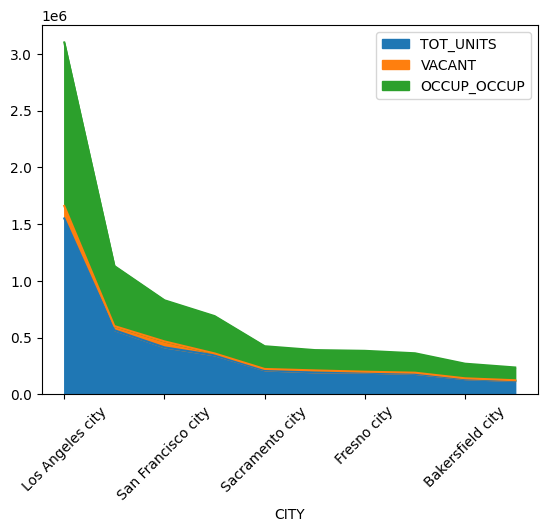

In [13]:
# call the ten major cities dataframe again
df = california_22[['CITY','TOT_UNITS','VACANT','OCCUP_OCCUP']].sort_values(by='TOT_UNITS', ascending=False).head(10)
df
df.plot(x='CITY', kind='area', rot=45) # rot=45 rotates our x-axis labels 45 degrees

The first warning is about choosing the variables to plot. If your variables are measured at a different scale (e.g.: one variable is in millions of dollars, and another variable is temperature in degrees centigrade) then the proportions will be meaningless relative to each other.

The second and more important caveat is that area plots stack values on top of each other, the representation is _additive_. In the area plot above, you are seeing the total units plus occupied units plus vacant units on the y-axis. Therefore you (and your audience) will have to understand that the quantity of `VACANT` units does not _exceed_ the number of `TOT_UNITS` even though it is higher on the y-axis. We simply chose to place the area for total units first, so it appears at the bottom of the plot. Try changing the order of the columns in `[['CITY','TOT_UNITS','VACANT','OCCUP_OCCUP']]` and see how the areas change position. 

## Grouping variables .groupby() and .pivot_table()
Grouping data your data with groupby() (see the previous chapter on Pandas) is not just for making tables (though tables can be excellent data visualization!). Grouped tables also become simplified versions of our dataframes that pyplot can easily interpret and plot. Let's look at the `california` dataframe that includes all years from 2010 to 2022 and group by those variables. In parallel to .groupby() we will also show pandas' .pivot_table() function that does largely the same as .groupby(). Pay attention to how the functions resemble each other and differ from one another, though for the remainder of this chapter we will generally stick to .groupby().

In [14]:
# groupby()
california.groupby('YEAR').aggregate({'VACANT':'sum'})

# pivot_table
california.pivot_table('VACANT', columns='YEAR', aggfunc='sum')

,VACANT
YEAR,
2010,635016
2011,606537
2012,536189
2013,526722
2014,527219
2015,491550
2016,506163
2017,559227
2018,585997


YEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022
VACANT,635016,606537,536189,526722,527219,491550,506163,559227,585997,609729,553065,536416


Notice the arguments used in the pivot_table() function. You define the numeric variable first, then state your groups with `index=` (rows) and `columns=`. Finally you specify what math operation to perform on the numeric values with `aggfunc=`. Pivot, however, limits you to a single kind of math operation in the 'aggfunc=' argument. On the other hand, as we mentioned previously, '.groupby()' does allow you to enter multiple math operations for different columns more easily (see Pandas II on aggregation). This table is already quite informative, but a plot allows the reader to really understand the scope of these vacancy values relative to each state and year. To do this, we can pass this entire pivot table to '.plot()' 

### Line plot

With years along the x-axis we can visualize trends, like how the total number of vacancies has changed over time. Remember that the line plot is the default kind of chart for the plot() function. In the cell below you can call the plot on our grouped table and it will be identical to the second plot where we make `kind='line'` explicit.

<Axes: xlabel='YEAR'>

<Axes: xlabel='YEAR'>

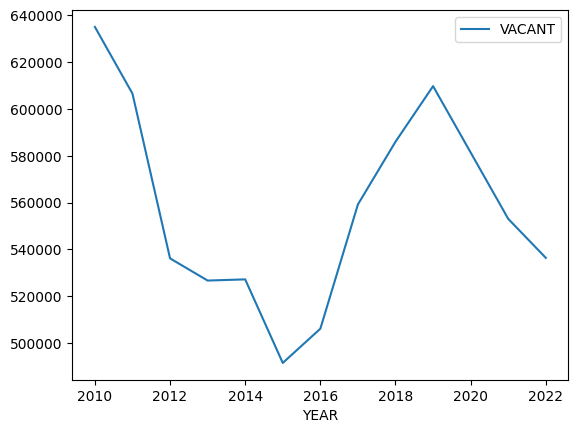

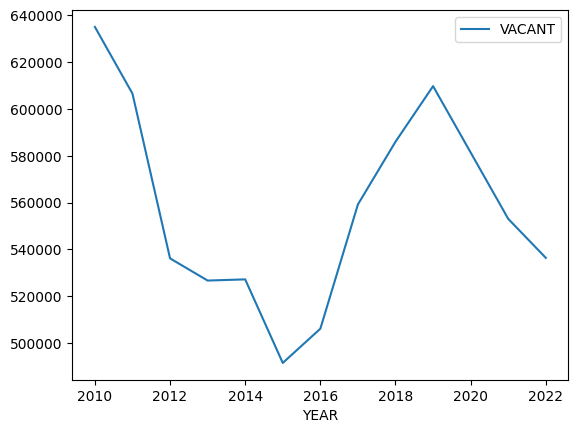

In [15]:
# this time assign grouped tables to the temporary 'df' object
df=california.groupby('YEAR').aggregate({'VACANT':'sum'})
df.plot()

df=california.pivot_table('VACANT', index='YEAR', aggfunc='sum')
df.plot(kind='line')

### Scatter plots

Another way to visualize the relationship between variables is the scatterplot. Whereas line plots are great for trends like growth, scatterplots are used to see how _continuous_ numeric data correlate. That is, if two variables have some kind of association where an increased value one variable influences another. Scatterplots visualize each observation's value for x and y on a single point, so it tends to look like a cloud. When this cloud is fuzzy and kind of circular, you can be fairly certain there is no correlation/association between variables. If there is a sharp angle to the cloud, on the other hand, then there is some kind of correlation. 

First we want to show you why scatterplots are generally not the best for non-continuous variables like `YEAR`. Plot the same data as the line plot above with a scatterplot and you get the full range of vacancies clustered around each year. This would be more informative if the bars were boxplots.

Note: the `kind=scatter` argument also _requires_ you to provide x and y values from columns in your dataframe. 

<Axes: xlabel='YEAR', ylabel='MED_RENT'>

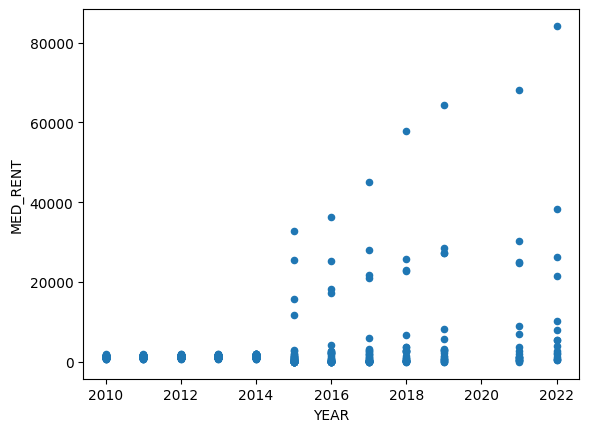

In [16]:
california.plot(kind='scatter', x='YEAR', y='MED_RENT')
plt.ticklabel_format(style='plain')

Instead let's compare two variables we can safely assume are strongly correlated: Median home value and median rent. The correlation we are going to assume is that a city with greater home prices will also have higher rents. This is a positive correlation and you would expect to see a scattering of points poitning upwards to the right.

<Axes: xlabel='MED_RENT', ylabel='MED_VALUE'>

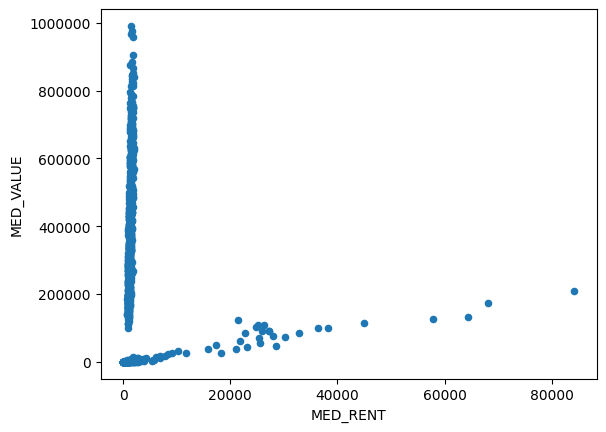

In [17]:
california.plot(kind='scatter', x='MED_RENT', y='MED_VALUE')
plt.ticklabel_format(style='plain')

Something seems off with our plot, but we assure you it is accurate! This is where visualization is so useful to understanding your data better. We definitely see a positive association where higher median home value meant higher median rent. But there are two clusters of data, where we would expect a single cloud of observations varying randomly. Something must be going on with either `MED_VALUE` or `MED_RENT`. 

In order to investigate further, more visualizations are actually very helpful. We know that the data are spread across multiple cities and multiple years, and that it is either the value variable or the rent variable that make the data cluster into two clusters. We might even assume it is more likely to be `MED_VALUE` because we see a more stark split in values along the y-axis.

Try plotting each variable over the years.

<Axes: xlabel='YEAR'>

<Axes: xlabel='YEAR'>

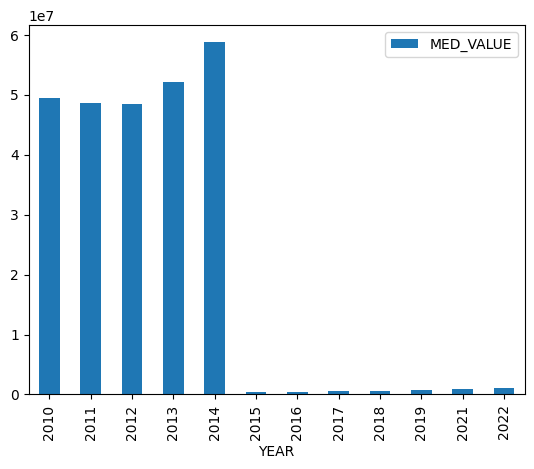

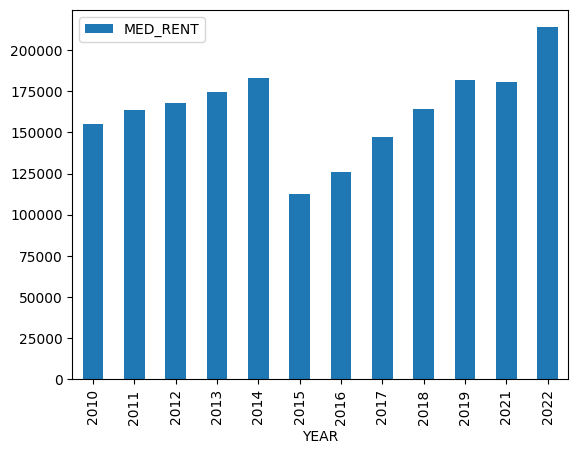

In [18]:
df=california.groupby('YEAR').aggregate({'MED_VALUE':'sum'})
df.plot(kind='bar')

df=california.groupby('YEAR').aggregate({'MED_RENT':'sum'})
df.plot(kind='bar')

The median value variable does in fact have two very different levels atarting in 2015. Searching the ACS documentation you can read about their decision to change the methods used to estimate median home prices in 2016! [REFERENCE] A bar plot of home prices by year highlights just how stark this difference is. Now you have choices about whether to investigate the estimation method and fix these prices, or to focus on either the pre-2015 or post-2015 data, and you might not have come across this issue without a visualization. 

## Multiple Groups

So far you have grouped variables by year to see trends in the data. You were essentially creating categories of observations by the year which makes sense, but years are not exactly independent or discrete groups. States, on the other hand, are a good example of how you might be interested in grouping observations to make comparisons. There are a few too many states and territories in the whole `housing` dataset, so let's create one for an arbitrary region of the United States called `western_us` and let's make it include Arizona, California, Nevada, Oregon, and Washington.  

In [19]:
western_us=housing[housing['STATE'].str.contains('Arizona|California|Nevada|Oregon|Washington')]

You also have choices when making plots for multiple groups. Some kinds of plots have incorporated grouping functions, like boxplots. Others will only plot your grouped variables if you make these groupings yourself with a groupby() or pivot_table() function. First let us see how to plot multiple boxplots with the incorporated grouping argument `by=`. The syntax is very simple, like scatter, except you've switched some terms or x= and y= to 'by' and 'column', respectively. 

VAC_RATE    Axes(0.125,0.11;0.775x0.77)
dtype: object

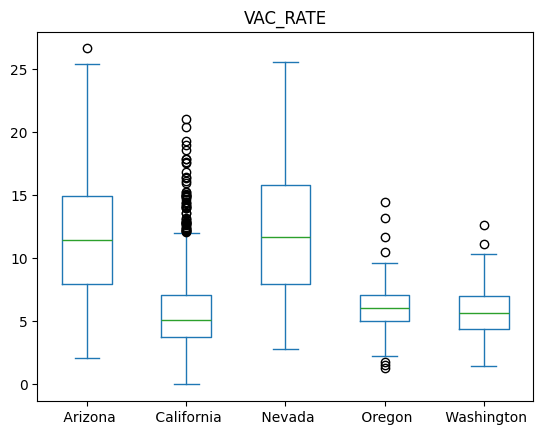

In [20]:
western_us.plot(kind='box', column='VAC_RATE', by='STATE')

We can do even more state contrasts now with some of the plots you've already created. You will also now need to be mindful about grouping by more than one variable; the example line plot previously grouped only by year. What if we want to observe the trend in _average_ number of vacant units across years for each of our western states? You will need to group by year _and_ state, which creates a complex table without clear columns. The resulting plot is a bit of a mess!

<Axes: xlabel='YEAR,STATE'>

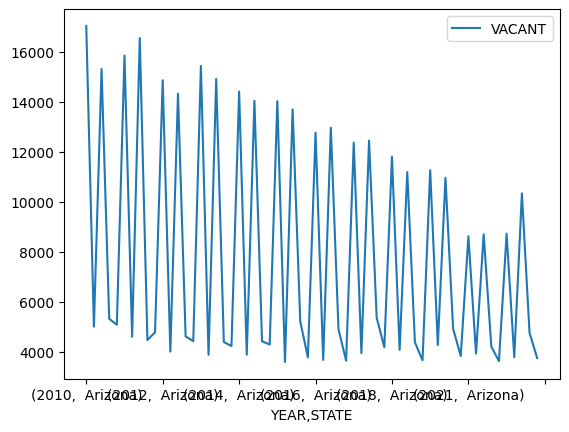

In [21]:
df = western_us.groupby(['YEAR', 'STATE']).aggregate({'VACANT':'mean'})
# df # this table is difficult to read. uncomment at your peril
df.plot()

What's happening is that the multiple groupings has created a table whose index is a concatenation of year and state. You can see by the name of the x-axis, `YEAR,STATE`, and on the ticks on the x-axis that say '(2010, Arizona)' etc... You an address this with the `.unstack()` function that widens the 'STATE' column (the second grouping variable) into multiple new columns for you. With a single index for 'YEARS', the data should now plot easily.

VACANT                                                  
STATE       Arizona   California        Nevada    Oregon   Washington
YEAR                                                                 
2010   17031.466667  5000.125984  15307.333333  5313.250  5076.642857
2011   15850.062500  4594.977273  16544.777778  4461.625  4774.714286
2012   14857.312500  4001.410448  14319.666667  4607.125  4419.266667
2013   15432.125000  3872.955882  14913.333333  4383.750  4225.375000
2014   14405.625000  3876.610294  14035.666667  4413.000  4283.294118
2015   14019.812500  3587.956204  13691.000000  5199.750  3769.941176
2016   12760.687500  3667.847826  12958.000000  4897.500  3639.000000
2017   12363.529412  3938.218310  12443.888889  5355.375  4172.529412
2018   11801.470588  4069.423611  11184.111111  4375.500  3654.105263
2019   11258.529412  4263.839161  10956.666667  4916.250  3826.950000
2021    8617.555556  3922.446809   8690.888889  4201.000  3618.600000
2022    8718.105263  3777.577465  10333.333333  4751.250  3742.600000

<Axes: xlabel='YEAR'>

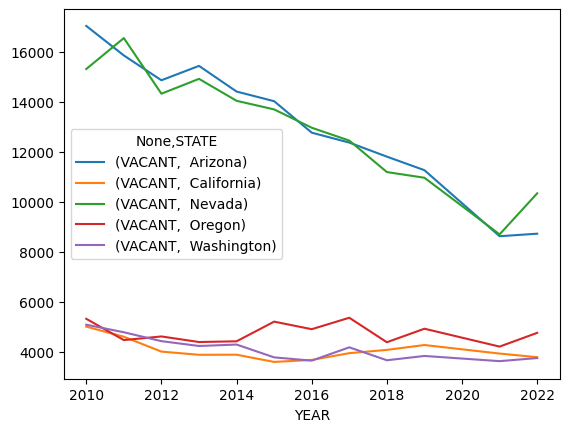

In [22]:
df = western_us.groupby(['YEAR', 'STATE']).aggregate({'VACANT':'mean'}).unstack()
df
df.plot()  

The plot() function was even nice enough to color code our different state columns! At this point, we are done looking at default plots with all their faults and features. It's time we looked at the pyplot `plt` functions that add and alter key plot elements like your axis labels, legends, colors, line and dot shapes, etc. 

# Plot customization

You might have noticed the plots have been, thus far, a little rough around the edges. Matplotlib carries many ways to change the appearance of the basic charts you have seen. So many that 1) we cannot possibly cover them all, and 2) The ones we do want to share need their own section. So we will be revisiting our previous charts and adding text, color, annotations, and generally cleaning up!

There are so many plotting functions, and each can do so much, that we included a link to each function's documentation on the matplotlib website so that you can get a gist of the many options you have. As an example, we can teach you to add a title above a plot and you can follow the link to the plt.title() documentation to learn how to choose fonts, font sizes, and text alignment to customize your title further.

### Labelling

The default plots will do their best to label your data but the job is never exactly right. That's because matplotlib doesn't know anything about your data beyond the numbers, so let's go back to an earlier horizontal bar chart on the top ten cities by vacant properties.

<Axes: ylabel='CITY'>

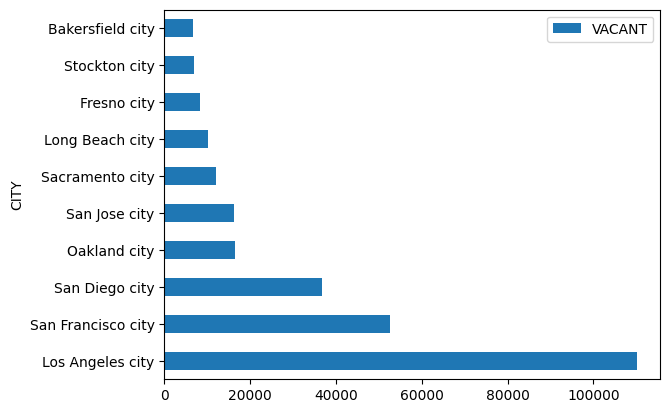

In [23]:
df = california_22[['VACANT','CITY']].sort_values(by='VACANT', ascending=False).head(10)
df.plot(x='CITY',kind='barh')

There are four things we should change about this chart: 

1. Add a title explaining what we are plotting.
2. Remove "CITY" from the y-axis label because we know these are cities.
3. Remove the "VACANT" legend from the plot surface.
4. Add the string "Number of vacant properties" to the x-axis' label. 

There are pyplot functions for ech of these tasks: You can use the [plt.title()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) to add strings to a title. Edit your plot's legend with [plt.legend()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html); you can assign an empty value with empty quotes to remove the legend and remove the border frame too with the `frameon=False` argument. Similarly, remove the label from an axis using [plt.ylabel()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html) or [plt.xlabel()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) and pass it an empty string too. Use the same function to create your own labels for an x-axis.

<Axes: ylabel='CITY'>

Text(0.5, 1.0, 'Vacant Properties - Top Ten Cities in California')

Text(0, 0.5, '')

Text(0.5, 0, 'Number of vacant properties')

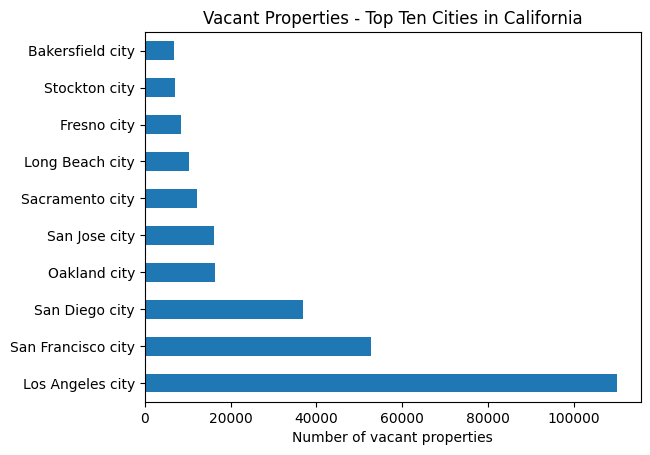

In [24]:
df.plot(x='CITY', kind='barh')
plt.title('Vacant Properties - Top Ten Cities in California')
plt.legend('', frameon=False)
plt.ylabel('')
plt.xlabel('Number of vacant properties')

As extra exercise: Below there is a boxplot with a title that we don't want to see. On your own, remove the plot title completely and add the label "Vacancy rate", to the y-axis.

VAC_RATE    Axes(0.125,0.11;0.775x0.77)
dtype: object

Text(0.5, 1.0, '')

Text(0, 0.5, 'Vacancy Rate')

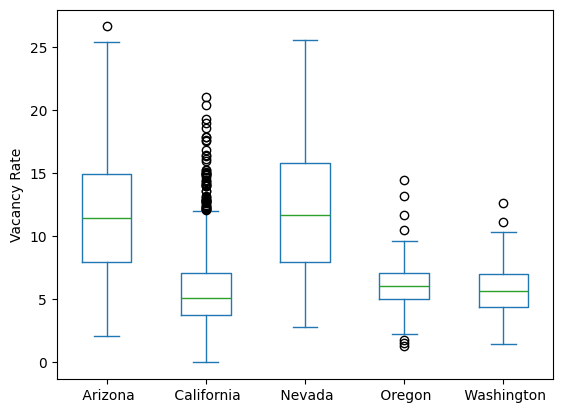

In [25]:
western_us.plot(kind='box', column='VAC_RATE', by='STATE')
# remove for students to do
plt.title('')
plt.ylabel('Vacancy Rate')

Sometimes by using pivot tables, your indexes become confusing for matplotlib. For example the line plot with multiple colored lines that tracked vacancies by year had a problem with its legend. The legend concatenates state names with the `VACANT` variable name. You can use the `plt.legend()` function to override the default legend with a list of values. The list just needs to be in square brackets within the legend() function. Finally, make sure your list is in the same order as the variables appear in the default legend.

<Axes: xlabel='YEAR'>

<function matplotlib.pyplot.show(close=None, block=None)>

<Axes: xlabel='YEAR'>

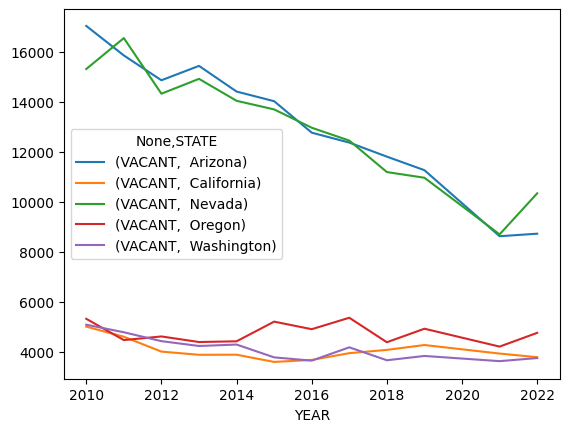

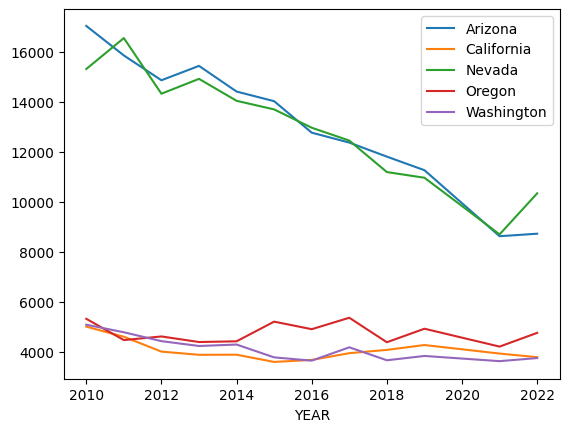

In [26]:
df = western_us.groupby(['YEAR', 'STATE']).aggregate({'VACANT':'mean'}).unstack()
df.plot()  
plt.show

# with cleaned legend
df.plot()
plt.legend(['Arizona','California','Nevada','Oregon','Washington'])

### Annotate

You are also able to add text at specific points in your plot with the [plt.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) function whenever there is an important point of inflection in your data. For example, our bar chart on median home values where ACS' method for calculating the variable changed in 2016. The contrast in years is so stark that it would be useful to highlight that point for added context. The default behavior of plt.annotate() is the string you want to enter in the plot first, in quotes. Then you specify arguments for the xy coordinates of the data point in question with `xy=(x,y)`. You specify the coordinates for the text string using `xytext=(x,y)`

Additionaly, we will show you the [plt.ticklabel_format](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ticklabel_format.html#matplotlib.pyplot.ticklabel_format) function here because the scale on the y-axis goes so high into the millions that the plot defaults to scientific notation. You can go back in this chapter to see what scientific notation looks like, but it essentially replaces zeros with an exponent. So 1,000,000 is `1e6`. To scale the y-axis back to normal, you want to specify the arguments `axis='y'` and `style='plain'`.

The xy coordinates can be many things, from the distance in pixels from a corner of the image, to using the coordinates from the data itself. The default is to use the data's values for x and y. Thus, the code cell below specifies that the data point is at `xy=5,40000`: 5 represents the index of the years column, where '2015' is the sixth index. 40,000 is a point just above the actual value for `MED_VALUE` in 2015. You can check that for yourself by printing the `df` object. We then set `xytext=6,1000000` to move the text further away from the datapoint. You can connect the datapoint and the text with the arrowprops argument. We set the parameters for the arrow with `arrowprops=` and a simple set of values. You can of course customize this heavily. If we didn't want an arrow at all, you could simply leave only an xy='' argument and that's where the text would be placed.

<Axes: xlabel='YEAR'>

Text(6, 10000000, 'ACS changes estimation method')

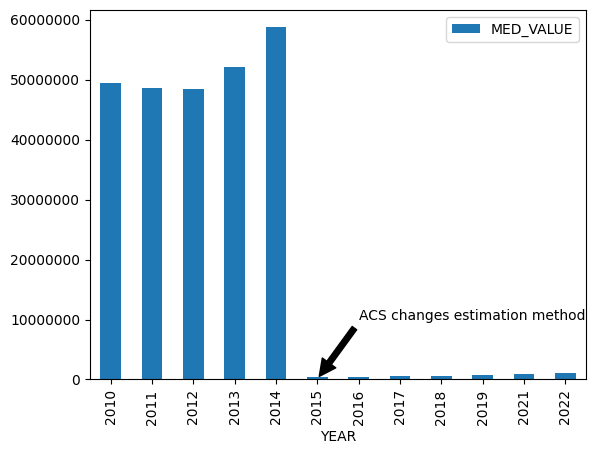

In [27]:
df=california.groupby('YEAR').aggregate({'MED_VALUE':'sum'})
df.plot(kind='bar')
# set y-axis tick marks to plain style instead of scientific notation
plt.ticklabel_format(style='plain', axis='y')   # to prevent scientific notation.
# annotate the plot
plt.annotate('ACS changes estimation method', xy=(5,40000), xytext=(6,10000000), arrowprops=dict(facecolor='black', shrink=0.05))

### Scaling plot axes with min and max values

When you want to place focus on a specific range of values in a plot, you can use `ylim()` and `xlim()` functions. These are very simple functions because you merely need to provide the minimum and maximum values for either axis. Let's look back at the scatterplot of median home value over median rent. In this plot there were two clusters of values. If you wanted to zoom in on either cloud, doing so by setting minimum and maximum x and y axis values would make it easy, since these clusters don't overlap. Similarly, there are plots where outlier values distort the proportion of the visualization. 

<Axes: xlabel='MED_RENT', ylabel='MED_VALUE'>

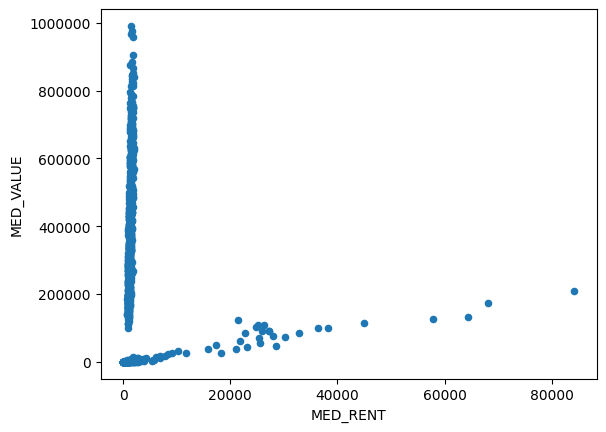

<Axes: xlabel='MED_RENT', ylabel='MED_VALUE'>

(0.0, 3000.0)

(25000.0, 1200000.0)

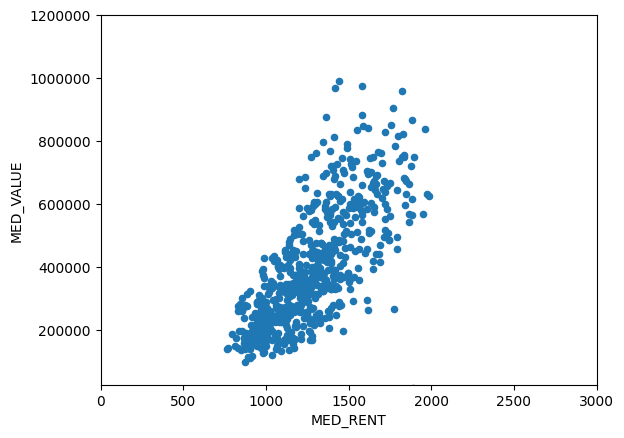

<Axes: xlabel='MED_RENT', ylabel='MED_VALUE'>

(0.0, 90000.0)

(0.0, 300000.0)

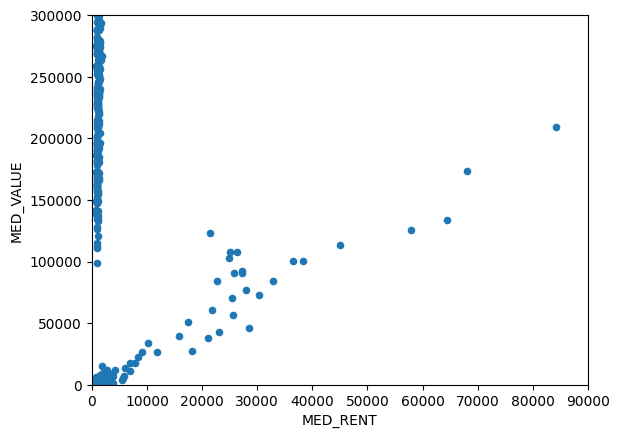

In [28]:
california.plot(kind='scatter', x='MED_RENT', y='MED_VALUE')
plt.ticklabel_format(style='plain')
plt.show()

# crop the plot to show the higher values of med_value
california.plot(kind='scatter', x='MED_RENT', y='MED_VALUE')
plt.ticklabel_format(style='plain')
plt.xlim(0,3000)
plt.ylim(25000,1200000)
plt.show()

# crop the plot to show the higher values of med_rent
california.plot(kind='scatter', x='MED_RENT', y='MED_VALUE')
plt.ticklabel_format(style='plain')
plt.xlim(0,90000)
plt.ylim(0,300000)
plt.show()


### Shapes and color

Changing the default shapes and colors for your plots is very simple but you have _a lot_ of options. There is a comprehensive list of shapes an colors on the matplotlib documentation [here](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.plot), and several demos [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html). We'll revisit all of our plots once again and give them a simple shape and color makeover.

#### Lines
Let's change the line style to a dotted line with the `linestyle` argument, and change the line color to green with the `color` argument. You can also change the width of the linde using `linewidth`.

<Axes: xlabel='YEAR'>

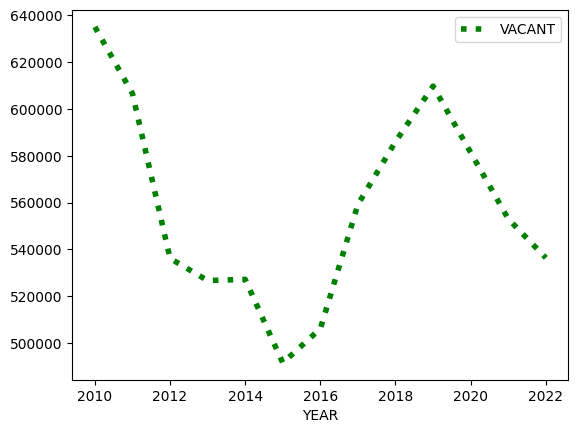

In [29]:
df=california.groupby('YEAR').aggregate({'VACANT':'sum'})
df.plot(linestyle=':', color='green', linewidth=4)

#### Dots
When using scatterplots, there are many shapes we can use. We'll pick the triangle shape with the `marker='^'` argument. If there is a third variable in the data that could categorize these points, you can represent that using colormaps. In the scatterplot of median home value over median rent, you can achieve this using the categorical `YEAR` variable. Because the method for calculating median home value changed in 2016 (reflected in the 2015 data), you can highlight the difference in distribution with a colormap for the years in the data.

You start by specifying color with `c=california['YEAR']` and `cmaps=''` to pick a colormap of our choice. There are _many_ colormaps to choose from in the [colormaps documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html). We chose a _diverging_ color map to visualize blue colors before 2015 and red colors after 2015. 

In case 2015 was not the mathematical center of the values in `YEAR` (and it isn't), you need to import the matplolib.colors package, specify the minimum, center, and maximum using the `mcolors.TwoSlopNorm()` function, and then call the resulting normalization in the plot() function using the `norm=` argument. We specified the center as 2015 at the start of the code cell and called that within california.plot(). You can try removing the norm=center argument to see what changes, and try different colormaps for yourself (`cmap='cool'`, for example).

Finally, you can choose to turn the markers semi-transparent with `alpha=` in order to see the points clustering more clearly. 

<Axes: xlabel='MED_RENT', ylabel='MED_VALUE'>

(-5000.0, 70000.0)

(-5000.0, 300000.0)

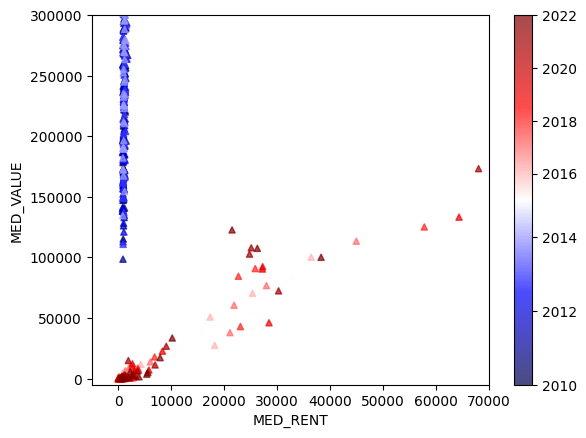

In [71]:
import matplotlib.colors as mcolors
center = mcolors.TwoSlopeNorm(vmin=2010, vcenter=2015, vmax=2022)

california.plot(kind='scatter', x='MED_RENT', y='MED_VALUE', 
                marker='^', 
                norm=center, c=california['YEAR'], cmap='seismic', 
                alpha=0.7, )
plt.xlim(-5000,70000)
plt.ylim(-5000,300000)
plt.ticklabel_format(style='plain')
plt.show()

## Saving your work
To save an image that you generated in Python (in JupyterLab or otherwise) to your local files, you can use matplolib's [savefig()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) function. Call the savefig() function after you have generated your plot, and provide the function with a string of the name and image file extension you want to give it. The extension could be _.gif, .jpg_, or the default _.png_. If you only provide a file name, the image will save in your current working directory. If you are using Jupter Notebooks, that would be the same folder where your _.ipynb_ notebook is located. If you wanted to save the file somewhere else, you would use a file path structure in your string (i.e.: `plt.savefig(../../Data/ACS/state_vacant_plot.png)`) would save it in the main ACS data folder. For now, go ahead and save your plot in the current working directory. 

add words about wanting to save plots to use in a powerpoint or word doc. 

how to change resolution, a different file type. Explain what file types are good for, and why svg is convenient. jpeg is not supported. explain DPI, dimension, 

<Axes: xlabel='YEAR'>

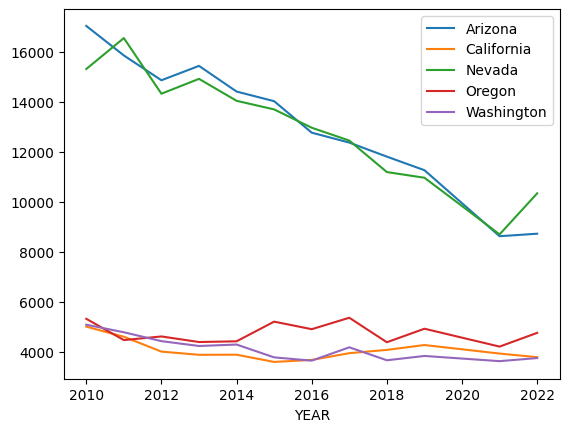

In [31]:
df = western_us.groupby(['YEAR', 'STATE']).aggregate({'VACANT':'mean'}).unstack()
df.plot()
plt.legend(['Arizona','California','Nevada','Oregon','Washington'])
plt.savefig("state_vacant_plot.svg")

# To-do

talk about the ACS data change from 2015 onwards in median value and rent, and how the scatterplots demonstrate this.

 homework assignment possibility: remove "city" from city name in a homework assignment. and tell them about that in the barplot section here. 